# Gabarito Lista 5 ACA124

In [1]:
# Primeiro instalamos e carregamos os pacotes necessários para resolver os exercícios
install.packages("lpSolve")
install.packages("igraph")
library(lpSolve)
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## Questão 1

A _Sorny_ possui duas fábricas no Brasil produzindo video games que devem ser remetidos a três centros de distribuição. O custo de produção são os mesmos em ambas as fábricas e o custo (em reais) de transporte por lote é mostrado na Tabela a seguir.


| Fábrica / CD | CD1   | CD2    | CD 3   |
|:------------:|:-----:|:------:|:------:|
| $F_1$| 800   | 700    | 400   |
| $F_2$| 600   | 800    | 500   |

Cada fábrica é capaz de produzir, no máximo, 50 lotes por mês.  Para satisfazer a procura por video games, cada centro de distribuição precisa de, exatamente, 20 lotes por mês. A _Sorny_ está interessaa em saber como enviar os lotes de forma a minimizar o custo total de transporte.

### Solução

Reparem que estamos ante um problema de transporte e as restrições são: 

- Cada fábrica pode produzir, no máximo 50 lotes por mês (não significa que produzira sempre 50, pode produzir menos, mas sua capacidade máxima é 50).
- Cada CD precisa receber exatamente 20 lotes.

Então, colocamos as restrições na Tabela


| Fábrica / CD | CD1   | CD2    | CD 3   | Origem |
|:------------:|:-----:|:------:|:------:|:------:|
| $F_1$| 800   | 700    | 400   |  $\leq 50$ | 
| $F_2$| 600   | 800    | 500   |  $\leq 50$ | 
| Destino |  = 20   |  =20   |  = 20  |   |

In [2]:
matriz_custos = matrix(c(800, 600, 700, 800, 400, 500), ncol = 3, nrow = 2)
lado_direito_sinal = rep("<=", 2)
lado_direito_valores = c(50, 50)
parte_abaixo_sinal = rep("=", 3)
parte_abaixo_valores = c(20, 20, 20)

In [3]:
# Reparem que a matriz de custos é exatamente como na Tabela
matriz_custos  

800,700,400
600,800,500


In [4]:
# Rodamos o algoritmo
resultados_prob_transporte = lp.transport(matriz_custos, "min", 
row.signs = lado_direito_sinal, row.rhs = lado_direito_valores, 
col.signs = parte_abaixo_sinal, col.rhs = parte_abaixo_valores)

In [5]:
# Solução ótima
resultados_prob_transporte$solution

0,20,20
20,0,0


Lembre-se que:

- A linha 1 representa a Fabrica 1
- A linha 2 representa a Fabrica 2
- A coluna 1 representa o CD1
- A coluna 2 representa o CD2
- A coluna 3 representa o CD3

Então, a solução ótima nos diz que da Fabrica 1 devemos prodruzir 40 lotes e enviar 20 para o CD2 e 20 para o CD3. Já da Fabrica 2 devemos produzir apenas 20 lotes e enviá-los ao CD1

In [6]:
# Se quisermos saber o custo que será gasto
resultados_prob_transporte

Success: the objective function is 34000 

Veja que é exatamente a mesma coisa do que multiplicar a quantidade de lotes enviados para cada CD pelo custo de envio:


In [7]:
20*700 + 20*400 + 20*600

[1] 34000

## Questão 2

A empresa _Baby Boomers_ possui três fábricas que produzem carrinhos de bebê que devem ser remetidos para quatro centros de distribuição. As fábricas 1, 2 e 3 produzem 12, 17 e 11 remessas por mês, respectivamente. Cada centro de distribuição precisa receber 10 remessas por mês. A distância entre cada fábrica e os respectivos centros de distribuição é apresentado na Tabela abaixo.

| Fábrica / CD | CD1   | CD2    | CD 3   | CD 4   |
|:------------:|:-----:|:------:|:------:|:------:|
| $F_1$| 800km   | 1300km    | 400km   | 700km   |
| $F_2$| 1100km  | 1400km    | 600km   | 1000km   |
| $F_3$| 600km   | 1200km    | 800km   | 900km   |


O custo do frete por remessa é de R.100 mais 50 centavos por km. A _Baby Boomers_ está interessada em transportar as remessas de forma que o custo de transporte entre as fábricas e centros de distribuição seja mínimo. Escreva quantas remessas de cada fábrica devem ser enviadas a cada centro de distribuição e qual será o custo final do frete para tender as demandas da _Baby Boomers_. **Dica: precisará reformular a Tabela**

### Solução

A Tabela não é exatamente o que queremos para poder enquadrar o problem em um problema de transporte. Contudo, temos a informação que "O custo do frete por remessa é de R.100 mais 50 centavos por km". Então utilizaremos esta informação para refazer a Tabela.

Uma forma fácil de transformar essas distâncias em uma matriz de custos, segundo o escrito no problema, é o seguinte.


In [8]:
matrix_distancias = matrix(c(800, 1100, 600, 1300, 1400, 1200, 400, 600, 800, 700, 1000, 900), ncol = 4)

# Veja que a matriz de distâncias é exatamente a definida no exercício
matrix_distancias

800,1300,400,700
1100,1400,600,1000
600,1200,800,900


In [9]:
# Agora, calcularemos a matriz de custos
matriz_custos = 100 + 0.5 * matrix_distancias
matriz_custos

500,750,300,450
650,800,400,600
400,700,500,550


> Você poderia ter feito essa operação manualmente, mas lembre-se que pode também utilizar o **R** como uma calculadora. O que foi feito é o seguinte: `0.5 * matriz_distancias` multiplicou por 0.5 cada elemento da matriz. Depois somei 100 a cada elemento da operação resultante.

Com essa matriz de custos, basta encontrar as restrições apropriadas e utilizar (agora sim) o problema de transporte.

Repare que as restrições são as seguintes:

- $F_1$ produz 12 remessas 
- $F_2$ produz 17 remessas.
- $F_3$ produz 11 remessas.
- CD1 precisa 10 remessas.
- CD2 precisa 10 remessas.
- CD3 precisa 10 remessas.
- CD4 precisa 10 remessas.


| Fábrica / CD | CD1   | CD2    | CD 3   | CD 4   | Origem
|:------------:|:-----:|:------:|:------:|:------:|:------:|
| $F_1$| 500  | 750   | 300  | 450  | = 12 |
| $F_2$| 650  | 800   | 400  | 600  | = 17 |
| $F_3$| 400  | 700   | 500  | 550  | = 11 |
| Destino| = 10 | = 10    | = 10   | = 10  |   |

> Repare que a soma dos destinos (10 + 10 + 10 + 10 = 40) é igual à soma das origens (12 + 17 + 11 = 40). Isso já da a dica que todas as restrições são de igualdade. Note que isso não acontecia no exercício anterior.

In [10]:
# Como já temos a matriz de custos, faltam as restrições, rodar o algoritmo e obter a solução ótima.

lado_direito_sinal = rep("=", 3)
lado_direito_valores = c(12, 17, 11)
parte_abaixo_sinal = rep("=", 4)
parte_abaixo_valores = rep(10, 4)  # poderia ser também c(10, 10, 10, 10) é a mesma coisa. rep() signific que repete o valor 10, 4 vezes.

In [11]:
# Rodamos o algoritmo

resultados_prob_transporte = lp.transport(matriz_custos, "min", 
row.signs = lado_direito_sinal, row.rhs = lado_direito_valores, 
col.signs = parte_abaixo_sinal, col.rhs = parte_abaixo_valores)



In [12]:
# Solução ótima
resultados_prob_transporte$solution

0,0,2,10
0,9,8,0
10,1,0,0


Ou seja:

- Da $F_1$ enviamos 2 remessas para o CD3.
- Da $F_1$ enviamos 10 remessas para o CD4.
- Da $F_2$ enviamos 9 remessas para o CD2.
- Da $F_2$ enviamos 8 remessas para o CD3.
- Da $F_3$ enviamos 10 remessas para o CD1.
- Da $F_3$ enviamos 1 remessas para o CD2.

> Vejam que a interpretação é importante (se eu pedir na prova como interpretar, vocês já sabem como fazer).



In [13]:
# Se quisermos saber o custo total de envio das remessas das Fábricas aos CDs
resultados_prob_transporte

Success: the objective function is 20200 

O custo total de envio é 20200 (que é o mínimo possível).

## Questão 3




Pedro, Tiago, João e Henrique trabalham para Alexandre Gustave Eiffel na construção da Torre Eiffel. Para finalizar a primeira etapa da construção 4 tarefas são necessárias. Os quatro funcionários são capazes de fazer qualquer uma das quatro tarefas mas cada tarefa deve ser realizada unicamente por uma pessoa. O número de horas necessárias por cada um dos funcionários realizarem cada uma das tarefas são apresentadas na Tabela a seguir.


| Funcionário / Tarefa | T1   | T2    | T3  | T4   |
|:------------:|:-----:|:------:|:------:|:------:|
| Pedro | 4   | 6    |5   | 5   |
| Tiago | 7  | 4    | 5   | 6   |
| João  | 4   | 7    | 6   | 4   |
| Henrique  | 5   | 3    | 4   | 7   |


Como deve Gustave Eiffel atribuir as tarefas aos funcionários para terminar a primeira etapa da construção o mais rápido possível? qual é o número de horas necessário?

#### Solução

Note que precisamos designar trabalhadores para tarefas específicas a fim de terminar a obra o mais rápido possível. Estamos num problema de designação!. Lembre-se que num problema de designação as restrições são de igualdade e os lados diretos/lados inferiores são iguais a 1.

In [14]:
matriz_custos = matrix(c(4, 7, 4, 5, 6, 4, 7, 3, 5, 5, 6, 4, 5, 6, 4, 7), ncol = 4)

s_sinal = rep("=", 4)
s_valores = c(1, 1, 1, 1)

d_sinal = rep("=", 4)
d_valores = c(1, 1, 1, 1)

In [15]:
# Repare que a matriz de "custos" (na vdd horas gastas) é exatamente a mesma da Tabela
matriz_custos 

4,6,5,5
7,4,5,6
4,7,6,4
5,3,4,7


In [16]:
# Rodamos o algoritmo
resultados = lp.transport(matriz_custos, "min", 
                          row.signs = s_sinal, row.rhs = s_valores, 
                          col.signs = d_sinal, col.rhs = d_valores)

In [17]:
# Solução ótima
resultados$solution

1,0,0,0
0,1,0,0
0,0,0,1
0,0,1,0


Isso significa que:

- Pedro é designado para a Tarefa 1.
- Tiago é designado para a Tarefa 2.
- João é designado para a Tarefa 4.
- Henrique é designado para a Tarefa 3.

In [18]:
# Se quiseros saber o custo (na verdade número de horas) gaso em terminar a primeira etapa da obra:

resultados

Success: the objective function is 16 

O menos número de horas necessárias para terminar a primeira etapa da obra é 16.

## Questão 4

O grafo abaixo apresenta 6 oleodutos utilizados para transportar óleo do Campo do produtor para as refinarias, bem como as capacidades máximas de óleo que podem ser transportadas entre duas estações.


![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/LISTA5_2.png)

Qual o percurso que deve utilizado para que a maior quantidade óleo chegue até a refinária?

#### Solução

> Obs: não foi mencionado no problema, mas assume-se que "Campo" produz o suficiente para enviar a capacidade máxima se for o caso (8 + 10).

Estamos em um problema de fluxo máximo!

In [19]:
E = rbind(c("Campo", "A", 8), 
          c("Campo", "B", 10), 
          c("A", "B", 4), 
          c("A", "D", 6), 
          c("A", "C", 2), 
          c("B", "C", 5), 
          c("B", "D", 3), 
          c("C", "D", 6), 
          c("C", "Refinaria", 7), 
          c("D", "Refinaria", 12))
colnames(E) = c("From", "To", "capacity") # "capacity" é o único nome que deve aparecer exatamente como escrito aqui
rede = as.data.frame(E)
rede

From,To,capacity
<chr>,<chr>,<chr>
Campo,A,8
Campo,B,10
A,B,4
A,D,6
A,C,2
B,C,5
B,D,3
C,D,6
C,Refinaria,7


In [20]:
# Fazemos o grafo
g1 = graph_from_data_frame(rede)
g1

IGRAPH 0d48d47 DN-- 6 10 -- 
+ attr: name (v/c), capacity (e/c)
+ edges from 0d48d47 (vertex names):
 [1] Campo->A         Campo->B         A    ->B         A    ->D        
 [5] A    ->C         B    ->C         B    ->D         C    ->D        
 [9] C    ->Refinaria D    ->Refinaria

In [21]:
# Solução ótima

resultados = max_flow(g1, source = V(g1)["Campo"], target = V(g1)["Refinaria"])
resultados



$value
[1] 16

$flow
 [1] 8 8 0 6 2 5 3 0 7 9

$cut
[1] 4 5 6 7

$partition1
+ 3/6 vertices, named, from 0d48d47:
[1] Campo A     B    

$partition2
+ 3/6 vertices, named, from 0d48d47:
[1] C         D         Refinaria

$stats
$stats$nopush
[1] 6

$stats$norelabel
[1] 1

$stats$nogap
[1] 0

$stats$nogapnodes
[1] 0

$stats$nobfs
[1] 1



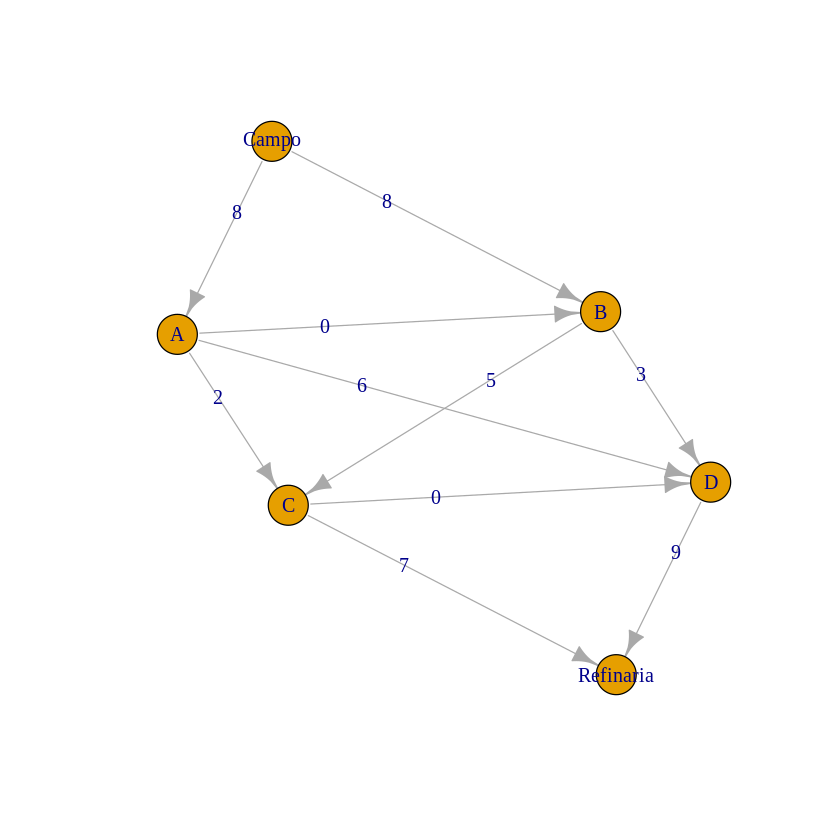

In [22]:
plot(g1, edge.label = resultados$flow)

Chegarão 16 "óleos" (commo não defini as unidades, vamos deixar em "óleos" mesmo) na refinaria.

## Questão 5

Evandro é carioca e recentemente mudou para Chapeco/RS a trabalho. Ele foi convidado para dar uma palestra em Porto Alegre/RS, mas por ser novo na região não sabe qual o melhor caminho para se locomover desde Chapecó para Porto Alegre. O grafo abaixo, apresenta os km que o carro deve percorrer entre cidades vizinhas até chegar em Porto Alegre.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/LISTA5_1.png)


Ajude o Evandro a descobrir qual o caminho mais curto a seguir para chegar de Chapecó até Porto Alegre.

#### Solução.

Estamos no problema do caminho mais curto!


In [23]:
E = rbind(c("Chapeco", "Jocaba", 400), 
          c("Chapeco", "Lages", 950), 
          c("Chapeco", "Joinville", 800), 
          c("Jocaba", "Caxias do Sul", 1800),
          c("Jocaba", "Florianopolis", 900),
          c("Lages", "Florianopolis", 600),
          c("Lages", "Caxias do Sul", 1100),
          c("Joinville", "Florianopolis", 600), 
          c("Joinville", "Sombrio", 1200), 
          c("Florianopolis", "Caxias do Sul", 900),
          c("Florianopolis", "Porto Alegre", 1300),
          c("Florianopolis", "Sombrio", 1000),
          c("Caxias do Sul", "Porto Alegre", 400),
          c("Sombrio", "Porto Alegre", 600))
colnames(E) = c("from", "to", "weight") 
rede = data.frame(E)
rede

from,to,weight
<chr>,<chr>,<chr>
Chapeco,Jocaba,400
Chapeco,Lages,950
Chapeco,Joinville,800
Jocaba,Caxias do Sul,1800
Jocaba,Florianopolis,900
Lages,Florianopolis,600
Lages,Caxias do Sul,1100
Joinville,Florianopolis,600
Joinville,Sombrio,1200


In [24]:
# Do dataframe para o grafo

g = graph_from_data_frame(rede)

In [25]:
# Solução otima

resultados = get.shortest.paths(g, from = V(g)["Chapeco"], to = V(g)["Porto Alegre"])
resultados$vpath



[[1]]
+ 4/8 vertices, named, from 93cd4d4:
[1] Chapeco       Lages         Caxias do Sul Porto Alegre 


O caminho mais Curto é: Chapeco --> Lages --> Caxias do Sul --> Porto Alegre e a distância percorrida é 2450 km

In [26]:
distances(g, v = V(g)["Chapeco"], to = V(g)["Porto Alegre"])

,Porto Alegre
Chapeco,2450


## Questão 6

_El rápido voador_ linhas aéreas esta prestes a decolar de Seattle (SE) com destino a Londres (LN). O Tempo (em horas) das possíveis rotas a serem tomadas é apresentado a seguir.


![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/LISTA5_3.png)



Qual percurso deveria ser percorrido se o piloto deseja chegar em Londres o mais rápido possível? (e quanto tempo isto levaria?)


#### Solução

Estamos, de novo, em um problema de caminho mais curto.

In [27]:
E = rbind(c("SE", "A", 4.6), 
          c("SE", "B", 4.7), 
          c("SE", "C", 4.2), 
          c("A", "D", 3.5),
          c("A", "E", 3.4),
          c("B", "D", 3.6),
          c("B", "E", 3.2),
          c("B", "F", 3.3), 
          c("C", "E", 3.5), 
          c("C", "F", 3.4),
          c("D", "LN", 3.4),
          c("E", "LN", 3.6),
          c("F", "LN", 3.8))
colnames(E) = c("from", "to", "weight") 
rede = data.frame(E)
rede

from,to,weight
<chr>,<chr>,<chr>
SE,A,4.6
SE,B,4.7
SE,C,4.2
A,D,3.5
A,E,3.4
B,D,3.6
B,E,3.2
B,F,3.3
C,E,3.5


In [28]:
# Do datafram ao grafo
g = graph_from_data_frame(rede)

In [29]:
resultados = get.shortest.paths(g, from = V(g)["SE"], to = V(g)["LN"])
resultados$vpath

[[1]]
+ 4/8 vertices, named, from 0b87c66:
[1] SE C  E  LN


O caminho mais curto é SE --> C --> E --> LN e a distância percorrida é 11.3 (milhares de km).

In [30]:
distances(g, v = V(g)["SE"], to = V(g)["LN"])

,LN
SE,11.3


## Questão 7

O banco _Muubank_ deseja conectar terminais de computador em cada uma das agências ao computador da sede central (ou matriz). A conexão será feita vía cabos de rede especiais e super costosos. Sabe-se que a conexão não precisa ser direta (agência-matriz), sendo totalmente possível que, digamos, um terminal de computador esteja conectado a outro terminal que, por sua vez, esteja conectado com a sede central (a única exigência é que cada filial esteja conectada através de alguma rota à sede matriz).

A distância (em km) entre cada par de agências é a seguinte.


|        | Matriz | B1    | B2    | B3     | B4     |  B5    |
|:------:|:------:|:-----:|:-----:|:------:|:------:|:------:|
| Matriz | 0      | 190   | 70    | 115    | 270    | 160    |
| B1     | 190    |   0   | 100   | 110    | 215    |  50    |
| B2     |  70    | 100   |   0   | 140    | 120    | 220    |
| B3     | 115    | 110   | 140   |   0    | 175    |  80    |
| B4     | 270    | 215   | 120   | 175    |    0   | 310    |
| B5     | 160    |  50   | 220   |  80    | 310    |   0    |


A gerência deseja determinar quais pares de agências devem estar
conectados diretamente através dos cabos de rede especiais de
modo a conectar todas as filiais (direta ou indiretamente) à matriz a um custo total mínimo (repare-se que a maior/menor distância maior/menor será o custo gasto com cabeamento). 

#### Solução

Repare que queremos conectar todos as agencias, ou seja, estamos no problema da árvore de expansão mínima.

Note também que embora não tenhamos o grafo, temos as "distâncias" potenciasis (que é todo o necessário para o prolema da árvore de expansão mínima)



In [31]:
E = rbind(c("Matriz", "B1", 190),
          c("Matriz", "B2", 70),
          c("Matriz", "B3", 115),
          c("Matriz", "B4", 270),
          c("Matriz", "B5", 160),
          c("B1", "B2", 100),
          c("B1", "B3", 110),
          c("B1", "B4", 215),
          c("B1", "B5", 50),
          c("B2", "B3", 140),
          c("B2", "B4", 120),
          c("B2", "B5", 220),
          c("B3", "B4", 175),
          c("B3", "B5", 80),
          c("B4", "B5", 310))
colnames(E) = c("No1", "No2", "weight")
rede = as.data.frame(E)
rede

No1,No2,weight
<chr>,<chr>,<chr>
Matriz,B1,190
Matriz,B2,70
Matriz,B3,115
Matriz,B4,270
Matriz,B5,160
B1,B2,100
B1,B3,110
B1,B4,215
B1,B5,50


In [32]:
# Dataframe para grafo
g = graph_from_data_frame(rede, directed = FALSE)

In [33]:
# Rodar algoritmo (solução ótima)
g_mst = mst(g)

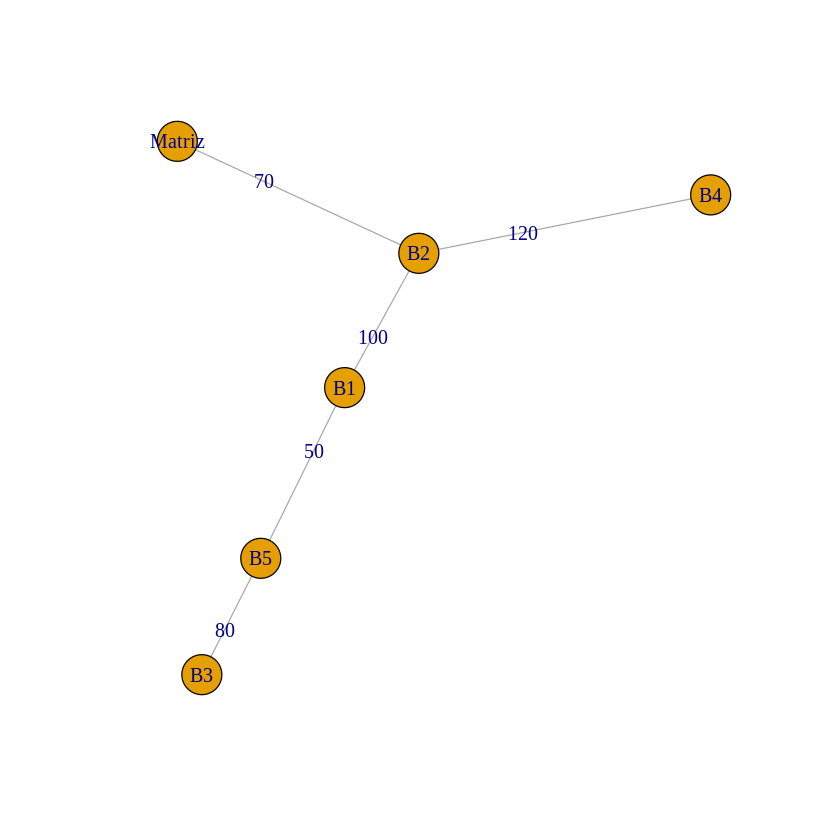

In [34]:
# Grafico com a solução
plot(g_mst, edge.label = E(g_mst)$weight)

In [35]:
sum(as.numeric(E(g_mst)$weight))

[1] 420

Para que todas as agencias e a matriz estejam conectadas entre si, afim de utilizar a menor quantidade de cabo:
Matriz deve estar conectado com B2, B2 com B4 e B1, B1 com B5 e B5 com B3. Dessa forma, um total de 420km de cabo serão utilizados.